<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session7/Final/mainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/S7'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test_py
import evaluate

In [5]:
classes, trainloader, testloader = train_test_loader.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


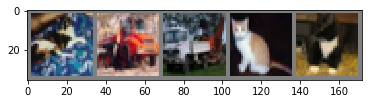

In [6]:
show_images.show_random_images(trainloader, classes)

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 16, 14, 14]           4,608
             ReLU-11           [-1, 16, 14, 14]               0
      BatchNorm2d-12           [-1, 16, 14, 14]              32
          Dropout-13           [-1, 16, 14, 14]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [9]:

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test_py.train(model, device, trainloader, optimizer, criterion, epoch)
    train_test_py.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1311938762664795 Batch_id=390 Accuracy=47.78: 100%|██████████| 391/391 [00:11<00:00, 33.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5666/10000 (56.66%)

EPOCH: 2


Loss=1.074435830116272 Batch_id=390 Accuracy=62.41: 100%|██████████| 391/391 [00:11<00:00, 33.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6608/10000 (66.08%)

EPOCH: 3


Loss=0.872763991355896 Batch_id=390 Accuracy=68.15: 100%|██████████| 391/391 [00:11<00:00, 33.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6823/10000 (68.23%)

EPOCH: 4


Loss=0.9261391758918762 Batch_id=390 Accuracy=71.33: 100%|██████████| 391/391 [00:11<00:00, 33.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6878/10000 (68.78%)

EPOCH: 5


Loss=0.6242944598197937 Batch_id=390 Accuracy=73.44: 100%|██████████| 391/391 [00:11<00:00, 33.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7278/10000 (72.78%)

EPOCH: 6


Loss=0.737900972366333 Batch_id=390 Accuracy=74.86: 100%|██████████| 391/391 [00:11<00:00, 33.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7530/10000 (75.30%)

EPOCH: 7


Loss=0.6278087496757507 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:11<00:00, 32.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7236/10000 (72.36%)

EPOCH: 8


Loss=0.619940996170044 Batch_id=390 Accuracy=77.15: 100%|██████████| 391/391 [00:11<00:00, 42.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7584/10000 (75.84%)

EPOCH: 9


Loss=0.7091702222824097 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:11<00:00, 41.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7320/10000 (73.20%)

EPOCH: 10


Loss=0.507408857345581 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:11<00:00, 38.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7688/10000 (76.88%)

EPOCH: 11


Loss=0.5397436022758484 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:11<00:00, 38.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7627/10000 (76.27%)

EPOCH: 12


Loss=0.4943343997001648 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:11<00:00, 33.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7546/10000 (75.46%)

EPOCH: 13


Loss=0.9063659906387329 Batch_id=390 Accuracy=80.25: 100%|██████████| 391/391 [00:11<00:00, 39.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7648/10000 (76.48%)

EPOCH: 14


Loss=0.5235894918441772 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [00:11<00:00, 33.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7830/10000 (78.30%)

EPOCH: 15


Loss=0.3486899137496948 Batch_id=390 Accuracy=81.17: 100%|██████████| 391/391 [00:11<00:00, 33.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7609/10000 (76.09%)

EPOCH: 16


Loss=0.6763778328895569 Batch_id=390 Accuracy=81.36: 100%|██████████| 391/391 [00:11<00:00, 33.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7811/10000 (78.11%)

EPOCH: 17


Loss=0.49749675393104553 Batch_id=390 Accuracy=81.70: 100%|██████████| 391/391 [00:11<00:00, 33.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7817/10000 (78.17%)

EPOCH: 18


Loss=0.4433838427066803 Batch_id=390 Accuracy=82.25: 100%|██████████| 391/391 [00:11<00:00, 33.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7898/10000 (78.98%)

EPOCH: 19


Loss=0.5069889426231384 Batch_id=390 Accuracy=82.38: 100%|██████████| 391/391 [00:11<00:00, 34.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7807/10000 (78.07%)

EPOCH: 20


Loss=0.5515576601028442 Batch_id=390 Accuracy=82.75: 100%|██████████| 391/391 [00:11<00:00, 34.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7869/10000 (78.69%)

EPOCH: 21


Loss=0.5033909678459167 Batch_id=390 Accuracy=83.10: 100%|██████████| 391/391 [00:11<00:00, 33.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7964/10000 (79.64%)

EPOCH: 22


Loss=0.5274435877799988 Batch_id=390 Accuracy=83.31: 100%|██████████| 391/391 [00:11<00:00, 34.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7940/10000 (79.40%)

EPOCH: 23


Loss=0.5324863791465759 Batch_id=390 Accuracy=83.49: 100%|██████████| 391/391 [00:11<00:00, 34.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7919/10000 (79.19%)

EPOCH: 24


Loss=0.4071766436100006 Batch_id=390 Accuracy=83.86: 100%|██████████| 391/391 [00:11<00:00, 34.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7860/10000 (78.60%)

EPOCH: 25


Loss=0.5833009481430054 Batch_id=390 Accuracy=84.08: 100%|██████████| 391/391 [00:11<00:00, 41.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8102/10000 (81.02%)

EPOCH: 26


Loss=0.4645954966545105 Batch_id=390 Accuracy=84.31: 100%|██████████| 391/391 [00:11<00:00, 33.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7918/10000 (79.18%)

EPOCH: 27


Loss=0.31245243549346924 Batch_id=390 Accuracy=84.31: 100%|██████████| 391/391 [00:11<00:00, 33.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8051/10000 (80.51%)

EPOCH: 28


Loss=0.5762366652488708 Batch_id=390 Accuracy=84.53: 100%|██████████| 391/391 [00:11<00:00, 34.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8046/10000 (80.46%)

EPOCH: 29


Loss=0.34798604249954224 Batch_id=390 Accuracy=84.81: 100%|██████████| 391/391 [00:11<00:00, 34.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8189/10000 (81.89%)

EPOCH: 30


Loss=0.4179253578186035 Batch_id=390 Accuracy=84.99: 100%|██████████| 391/391 [00:11<00:00, 33.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8055/10000 (80.55%)

EPOCH: 31


Loss=0.49954038858413696 Batch_id=390 Accuracy=85.12: 100%|██████████| 391/391 [00:11<00:00, 34.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8133/10000 (81.33%)

EPOCH: 32


Loss=0.576177179813385 Batch_id=390 Accuracy=85.17: 100%|██████████| 391/391 [00:12<00:00, 32.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8221/10000 (82.21%)

EPOCH: 33


Loss=0.4124579429626465 Batch_id=390 Accuracy=85.40: 100%|██████████| 391/391 [00:11<00:00, 33.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8109/10000 (81.09%)

EPOCH: 34


Loss=0.6853323578834534 Batch_id=390 Accuracy=85.12: 100%|██████████| 391/391 [00:11<00:00, 33.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7971/10000 (79.71%)

EPOCH: 35


Loss=0.36601725220680237 Batch_id=390 Accuracy=85.51: 100%|██████████| 391/391 [00:11<00:00, 33.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7925/10000 (79.25%)

EPOCH: 36


Loss=0.35617750883102417 Batch_id=390 Accuracy=85.82: 100%|██████████| 391/391 [00:11<00:00, 33.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8165/10000 (81.65%)

EPOCH: 37


Loss=0.3265003263950348 Batch_id=390 Accuracy=86.05: 100%|██████████| 391/391 [00:11<00:00, 33.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8205/10000 (82.05%)

EPOCH: 38


Loss=0.2653457522392273 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:11<00:00, 32.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8135/10000 (81.35%)

EPOCH: 39


Loss=0.5513185262680054 Batch_id=390 Accuracy=86.05: 100%|██████████| 391/391 [00:11<00:00, 33.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8040/10000 (80.40%)

EPOCH: 40


Loss=0.5300049185752869 Batch_id=390 Accuracy=86.44: 100%|██████████| 391/391 [00:11<00:00, 34.13it/s]



Test set: Average loss: 0.0048, Accuracy: 8141/10000 (81.41%)



GroundTruth:   frog   car  frog   car  deer
Predicted:   frog   car  frog   car  deer


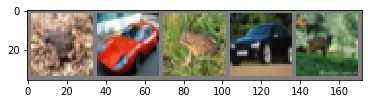

In [10]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [11]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 81 %


In [12]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 92 %
Accuracy of   car : 86 %
Accuracy of  bird : 86 %
Accuracy of   cat : 76 %
Accuracy of  deer : 80 %
Accuracy of   dog : 70 %
Accuracy of  frog : 90 %
Accuracy of horse : 75 %
Accuracy of  ship : 96 %
Accuracy of truck : 97 %
